In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LogisticRegression

In [3]:
plans2015=pd.read_excel("PY2015_Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")

In [4]:
NM2015=pd.read_excel("PY2015_NM-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")
NV2015=pd.read_excel("PY2015_NV-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")
OR2015=pd.read_excel("PY2015_OR-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")

In [5]:
plans2015=plans2015.append(NM2015)
plans2015=plans2015.append(NV2015)
plans2015=plans2015.append(OR2015)

In [6]:
openEnrollment2015=pd.read_excel("2015_OEP_County-Level_Public_Use_File.xlsx", "(1) Consumer Type")

In [7]:
hospitals=pd.read_csv("tabula-hosplis2016.csv")

In [8]:
hospitals=hospitals[["Facility", "County", "Beds", "Beds.1", "Ownership"]]
hospitals=hospitals.rename(columns={"Beds.1":"Psychiatric Beds"})

In [9]:
hospitals["County"]
x=[]
for i in hospitals["County"]:
    x.append(i)

d=[]
for j in x:
    d.append(re.sub(r'\d+', '', j))

#uppercase
r=[]
for l in d:
    r.append(re.sub('[^A-Z]', '', l))

#alphanumeric
s=[]
for k in r:
    s.append(re.sub(r'[^\w]', '', k))
f=[]
for p in s:
    f.append(p.title())

hospitals["Counties"]=pd.Series(f)

In [10]:
hospitals=hospitals.replace("Jimwells", "Jim Wells")
hospitals=hospitals.replace("Elpaso", "El Paso")
hospitals=hospitals.replace("Sanpatricio", "San Patricio")
hospitals=hospitals.replace("Dewitt", "DeWitt")
hospitals=hospitals.replace("Valverde", "Val Verde")
hospitals=hospitals.replace("Vanzandt", "Van Zandt")
hospitals=hospitals.replace("Tomgreen", "Tom Green")
hospitals=hospitals.replace("Throckmort", "Throckmorton")
hospitals=hospitals.replace("Sanaugustine", "San Augustine")
hospitals=hospitals.replace("Nbharris", "Harris")
hospitals=hospitals.replace("Ngrimes", "Grimes")
hospitals=hospitals.replace("Mcculloch", "McCulloch")
hospitals=hospitals.replace("Mclennan", "McLennan")
hospitals=hospitals.replace("Palopinto", "Palo Pinto")
hospitals=hospitals.replace("Nacogdoche", "Nacogdoches")
hospitals=hospitals.replace("Fortbend", "Fort Bend")
hospitals=hospitals.replace("Deafsmith", "Deaf Smith")


UniqueFacilities=hospitals.groupby("Counties")["Facility"].nunique().reset_index()

Beds=hospitals.groupby("Counties")["Beds"].sum().reset_index()

In [11]:
TX2015=plans2015[plans2015["State "]=="TX"]

In [12]:
TX2015["Premium Adult Individual Age 27"]=TX2015["Premium Adult Individual Age 27"].astype(str).astype(float)

C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
numberOfPlans=TX2015.groupby("County")["Plan ID (standard component)"].nunique().reset_index()
numberOfSilverPlans=TX2015[TX2015["Metal Level"]=="Silver"].groupby("County")["Plan ID (standard component)"].nunique().reset_index()

In [14]:
Edu = pd.read_csv("Texas Health Insurance/ACS_15_5YR_S1501_with_ann.csv", skiprows=1)
Uninsured=pd.read_csv("Texas Health Insurance/ACS_15_5YR_S2701_with_ann.csv", skiprows=1)
Pop = pd.read_csv("Texas Health Insurance/ACS_15_5YR_S0101_with_ann.csv", skiprows=1)
Employment = pd.read_csv("Texas Health Insurance/ACS_15_5YR_DP03_with_ann.csv", skiprows=1)
HealthRankings=pd.read_excel("Texas Health Insurance/2015 County Health Rankings Texas Data - v3.xls", "Ranked Measure Data", skiprows=1)
HealthRankings2=pd.read_excel("Texas Health Insurance/2015 County Health Rankings Texas Data - v3.xls", "Additional Measure Data", skiprows=1)

In [15]:
x=[]
for i, row in Edu["Geography"].iteritems():
    x.append(row.strip().split(",")[0].rsplit(" ", 1)[0])
    
Edu["County"]=pd.Series(x)
Edu=Edu[["County", "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings", "Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Associate's degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Total; Estimate; Population 65 years and over"]]

In [16]:
y=[]
for i, row in Uninsured["Geography"].iteritems():
    y.append(row.strip().split(",")[0].rsplit(" ", 1)[0])
    
Uninsured["County"]=pd.Series(y)
Uninsured=Uninsured[["County", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years"]]

In [17]:
z=[]
for i, row in Employment["Geography"].iteritems():
    z.append(row.strip().split(",")[0].rsplit(" ", 1)[0])
    
Employment["County"]=pd.Series(z)
Employment=Employment[["County", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)"]]

In [18]:
hospitals=pd.read_csv("tabula-hosplis2016.csv")
hospitals=hospitals[["Facility", "County", "Beds", "Beds.1", "Ownership"]]
hospitals=hospitals.rename(columns={"Beds.1":"Psychiatric Beds"})

hospitals["County"]
x=[]
for i in hospitals["County"]:
    x.append(i)

d=[]
for j in x:
    d.append(re.sub(r'\d+', '', j))

#uppercase
r=[]
for l in d:
    r.append(re.sub('[^A-Z]', '', l))

#alphanumeric
s=[]
for k in r:
    s.append(re.sub(r'[^\w]', '', k))
f=[]
for p in s:
    f.append(p.title())

hospitals["Counties"]=pd.Series(f)

In [19]:
hospitals=hospitals.replace("Jimwells", "Jim Wells")
hospitals=hospitals.replace("Elpaso", "El Paso")
hospitals=hospitals.replace("Sanpatricio", "San Patricio")
hospitals=hospitals.replace("Dewitt", "DeWitt")
hospitals=hospitals.replace("Valverde", "Val Verde")
hospitals=hospitals.replace("Vanzandt", "Van Zandt")
hospitals=hospitals.replace("Tomgreen", "Tom Green")
hospitals=hospitals.replace("Throckmort", "Throckmorton")
hospitals=hospitals.replace("Sanaugustine", "San Augustine")
hospitals=hospitals.replace("Nbharris", "Harris")
hospitals=hospitals.replace("Ngrimes", "Grimes")
hospitals=hospitals.replace("Mcculloch", "McCulloch")
hospitals=hospitals.replace("Mclennan", "McLennan")
hospitals=hospitals.replace("Palopinto", "Palo Pinto")
hospitals=hospitals.replace("Nacogdoche", "Nacogdoches")
hospitals=hospitals.replace("Fortbend", "Fort Bend")
hospitals=hospitals.replace("Deafsmith", "Deaf Smith")


UniqueFacilities=hospitals.groupby("Counties")["Facility"].nunique().reset_index()

Beds=hospitals.groupby("Counties")["Beds"].sum().reset_index()

In [20]:
HealthRankings=HealthRankings[["County", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems"]]
HealthRankings2=HealthRankings2[["County", "% Hispanic", "% African American", "% Rural", "% Diabetic", "HIV Prevalence Rate", "Age-Adjusted Mortality", "% Food Insecure", "Costs"]]

#HealthRankings=HealthRankings.replace("DeWitt", "De Witt")
#HealthRankings2=HealthRankings2.replace("DeWitt", "De Witt")

In [21]:
numberOfSilverPlans=numberOfSilverPlans.replace("De Witt", "DeWitt")
numberOfSilverPlans=numberOfSilverPlans.replace("Mcculloch", "McCulloch")
numberOfSilverPlans=numberOfSilverPlans.replace("Mclennan", "McLennan")
numberOfSilverPlans=numberOfSilverPlans.replace("Mcmullen", "McMullen")

In [22]:
numberOfPlans=numberOfPlans.replace("De Witt", "DeWitt")
numberOfPlans=numberOfPlans.replace("Mcculloch", "McCulloch")
numberOfPlans=numberOfPlans.replace("Mclennan", "McLennan")
numberOfPlans=numberOfPlans.replace("Mcmullen", "McMullen")

In [23]:
PlansModelDF=pd.merge(numberOfSilverPlans, Edu)
PlansModelDF=pd.merge(PlansModelDF, Uninsured)
PlansModelDF=pd.merge(PlansModelDF, Employment)
PlansModelDF=pd.merge(PlansModelDF, HealthRankings)
PlansModelDF=pd.merge(PlansModelDF, HealthRankings2)

In [24]:
PlansModelDF2=pd.merge(numberOfPlans, Edu)
PlansModelDF2=pd.merge(PlansModelDF2, Uninsured)
PlansModelDF2=pd.merge(PlansModelDF2, Employment)
PlansModelDF2=pd.merge(PlansModelDF2, HealthRankings)
PlansModelDF2=pd.merge(PlansModelDF2, HealthRankings2)

In [25]:
Beds=Beds.fillna(0)
UniqueFacilities=UniqueFacilities.fillna(0)

In [26]:
PlansModelDF2=pd.merge(PlansModelDF2, Beds, left_on="County", right_on="Counties", how="outer")
PlansModelDF2=pd.merge(PlansModelDF2, UniqueFacilities, left_on="County", right_on="Counties", how="outer")

In [27]:
PlansModelDF=pd.merge(PlansModelDF, UniqueFacilities, left_on="County", right_on="Counties", how="outer")
PlansModelDF=pd.merge(PlansModelDF, Beds, left_on="County", right_on="Counties", how="outer")

In [28]:
avgPremiums=TX2015.groupby("County")["Premium Adult Individual Age 27"].mean().reset_index()

In [29]:
TX2015["Medical Deductible-individual-standard"]=TX2015["Medical Deductible-individual-standard"].str.replace(",", "")
TX2015["Medical Deductible-individual-standard"]=TX2015["Medical Deductible-individual-standard"].str.replace("$", "")
TX2015["Medical Deductible-individual-standard"]=TX2015["Medical Deductible-individual-standard"].astype(int)


C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [30]:
avgDeductible=TX2015.groupby("County")["Medical Deductible-individual-standard"].mean().reset_index()

In [31]:
avgDeductible=avgDeductible.replace("De Witt", "DeWitt")
avgDeductible=avgDeductible.replace("Mcculloch", "McCulloch")
avgDeductible=avgDeductible.replace("Mclennan", "McLennan")
avgDeductible=avgDeductible.replace("Mcmullen", "McMullen")

In [32]:
numberInsurers=TX2015.groupby("County")["Issuer Name"].nunique().reset_index()

In [33]:
avgPremiums=avgPremiums.replace("De Witt", "DeWitt")
avgPremiums=avgPremiums.replace("Mcculloch", "McCulloch")
avgPremiums=avgPremiums.replace("Mclennan", "McLennan")
avgPremiums=avgPremiums.replace("Mcmullen", "McMullen")

In [34]:
numberInsurers=numberInsurers.replace("De Witt", "DeWitt")
numberInsurers=numberInsurers.replace("Mcculloch", "McCulloch")
numberInsurers=numberInsurers.replace("Mclennan", "McLennan")
numberInsurers=numberInsurers.replace("Mcmullen", "McMullen")

In [35]:
PlansModelDF=pd.merge(PlansModelDF, avgPremiums)
PlansModelDF=pd.merge(PlansModelDF, numberInsurers)

In [36]:
PlansModelDF2=pd.merge(PlansModelDF2, avgPremiums)
PlansModelDF2=pd.merge(PlansModelDF2, numberInsurers)

In [37]:
PlansModelDF2["Beds"]=PlansModelDF2["Beds"].fillna(0)
PlansModelDF2["Facility"]=PlansModelDF2["Facility"].fillna(0)

In [38]:
PlansModelDF2=pd.merge(PlansModelDF2, avgDeductible)

In [39]:
PlansModelDF2["Premium Adult Individual Age 27"]=PlansModelDF2["Premium Adult Individual Age 27"].divide(100)

In [40]:
PlansModelDF2["Total; Estimate; AGE - 18 to 64 years"]=PlansModelDF2["Total; Estimate; AGE - 18 to 64 years"].divide(1000)

In [41]:
PlansModelDF2["Medical Deductible-individual-standard"]=PlansModelDF2["Medical Deductible-individual-standard"].divide(100)

In [89]:
PlansModelDF2["Costs"].isnull().any()

True

In [90]:
PlansModelX=PlansModelDF2[["% Hispanic", "Percent Insured; Estimate; AGE - 18 to 64 years", "Average Daily PM2.5", "% Physically Inactive", "% Diabetic", "Total; Estimate; AGE - 18 to 64 years", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Facility"]]

In [91]:
PlansModelX = sm.add_constant(PlansModelX)

model=smf.OLS(PlansModelDF2["Plan ID (standard component)"], PlansModelX).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Plan ID (standard component)   R-squared:                       0.442
Model:                                      OLS   Adj. R-squared:                  0.422
Method:                           Least Squares   F-statistic:                     21.51
Date:                          Mon, 07 Aug 2017   Prob (F-statistic):           1.23e-26
Time:                                  19:10:35   Log-Likelihood:                -1014.2
No. Observations:                           254   AIC:                             2048.
Df Residuals:                               244   BIC:                             2084.
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
=====================================================================================================================================================
                                                                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               145.0782     24.084      6.024      0.000        97.639   192.518
% Hispanic                                                                           -0.1392      0.058     -2.415      0.016        -0.253    -0.026
Percent Insured; Estimate; AGE - 18 to 64 years                                       0.0496      0.156      0.318      0.751        -0.258     0.357
Average Daily PM2.5                                                                  -6.9364      1.264     -5.487      0.000        -9.426    -4.446
% Physically Inactive                                                                -1.2575      0.440     -2.860      0.005        -2.124    -0.392
% Diabetic                                                                           -2.3141      0.948     -2.441      0.015        -4.181    -0.447
Total; Estimate; AGE - 18 to 64 years                                                 0.0730      0.019      3.878      0.000         0.036     0.110
Percent; Estimate; Population 25 years and over - Graduate or professional degree     0.8354      0.388      2.151      0.032         0.071     1.600
Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force            0.1342      0.131      1.026      0.306        -0.123     0.392
Facility                                                                             -1.8639      0.595     -3.134      0.002        -3.035    -0.693
==============================================================================
Omnibus:                       87.197   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.500
Skew:                           1.512   Prob(JB):                     2.00e-56
Kurtosis:                       6.885   Cond. No.                     7.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


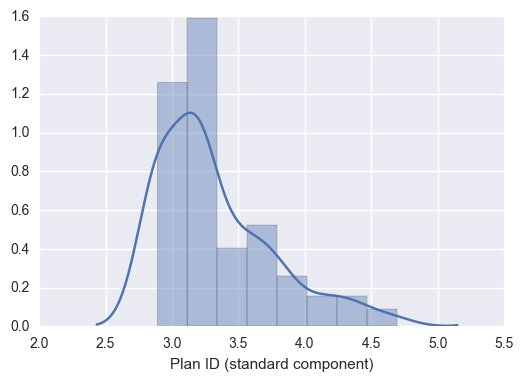

In [45]:
sns.distplot(np.log(PlansModelDF2["Plan ID (standard component)"]))

In [46]:
PlansX=PlansModelDF[["% Hispanic", "Average Daily PM2.5", "% Physically Inactive", "% Diabetic", "Total; Estimate; Population 65 years and over", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", 'Percent Insured; Estimate; AGE - 18 to 64 years', "Premium Adult Individual Age 27", "Issuer Name"]]

In [47]:
PlansX = sm.add_constant(PlansX)

model=smf.OLS(np.log(PlansModelDF["Plan ID (standard component)"]), PlansX).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Plan ID (standard component)   R-squared:                       0.883
Model:                                      OLS   Adj. R-squared:                  0.877
Method:                           Least Squares   F-statistic:                     165.7
Date:                          Mon, 07 Aug 2017   Prob (F-statistic):          6.13e-106
Time:                                  16:19:59   Log-Likelihood:                 88.919
No. Observations:                           254   AIC:                            -153.8
Df Residuals:                               242   BIC:                            -111.4
Df Model:                                    11                                         
Covariance Type:                      nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     1.6502      0.407      4.055      0.000         0.849     2.452
% Hispanic                                                                                0.0010      0.001      1.303      0.194        -0.001     0.003
Average Daily PM2.5                                                                      -0.0489      0.017     -2.807      0.005        -0.083    -0.015
% Physically Inactive                                                                    -0.0066      0.006     -1.117      0.265        -0.018     0.005
% Diabetic                                                                                0.0159      0.013      1.215      0.226        -0.010     0.042
Total; Estimate; Population 65 years and over                                           8.85e-06   2.78e-06      3.183      0.002      3.37e-06  1.43e-05
Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households -2.654e-06   7.49e-07     -3.545      0.000     -4.13e-06 -1.18e-06
Percent; Estimate; Population 25 years and over - Graduate or professional degree         0.0113      0.005      2.212      0.028         0.001     0.021
Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force               -0.0021      0.002     -1.203      0.230        -0.005     0.001
Percent Insured; Estimate; AGE - 18 to 64 years                                           0.0006      0.002      0.302      0.763        -0.003     0.005
Premium Adult Individual Age 27                                                           0.0011      0.001      1.238      0.217        -0.001     0.003
Issuer Name                                                                               0.3126      0.011     28.089      0.000         0.291     0.335
==============================================================================
Omnibus:                      107.528   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.153
Skew:                           1.706   Prob(JB):                    6.64e-104
Kurtosis:                       8.767   Cond. No.                     5.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+06. This might indicate that there are
strong

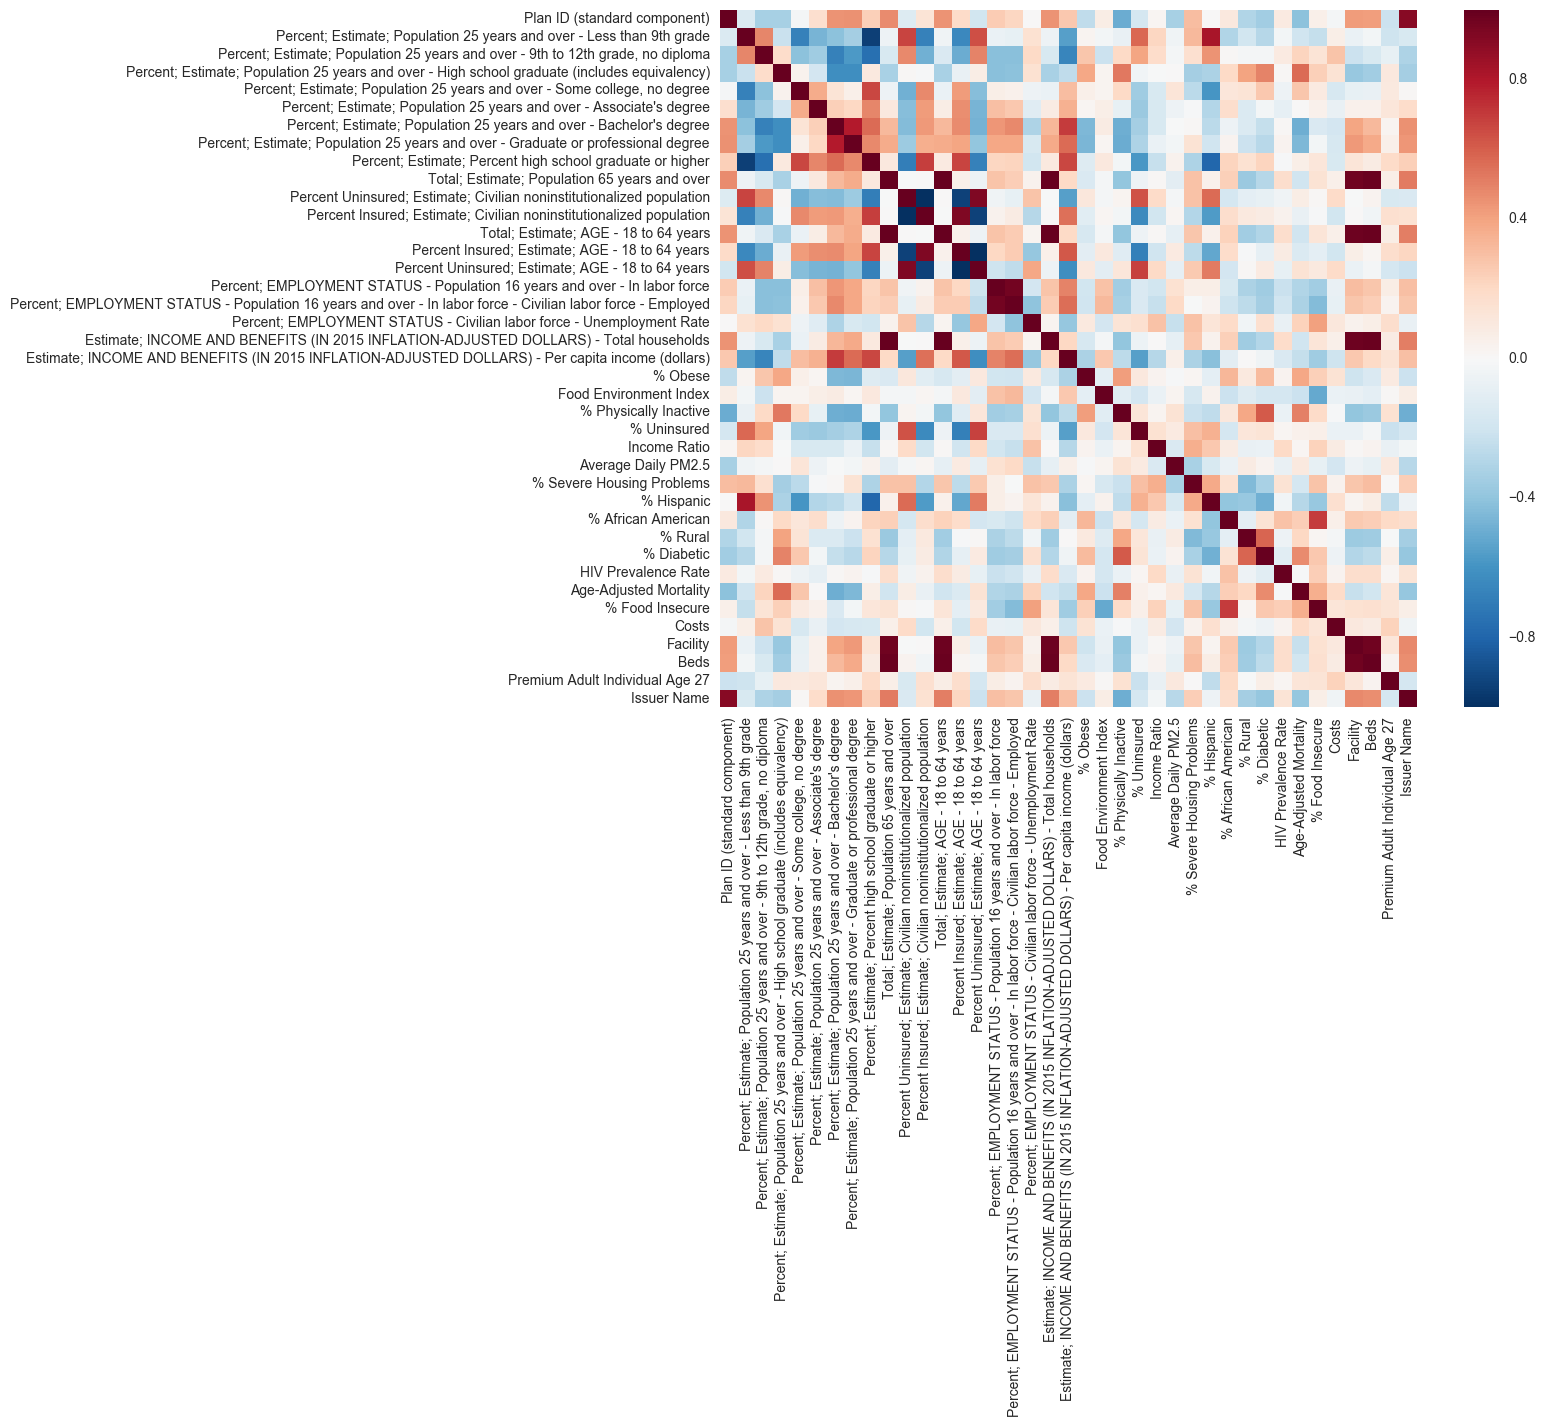

In [48]:
corrmatPlans = PlansModelDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatPlans, vmax=.8, square=True);

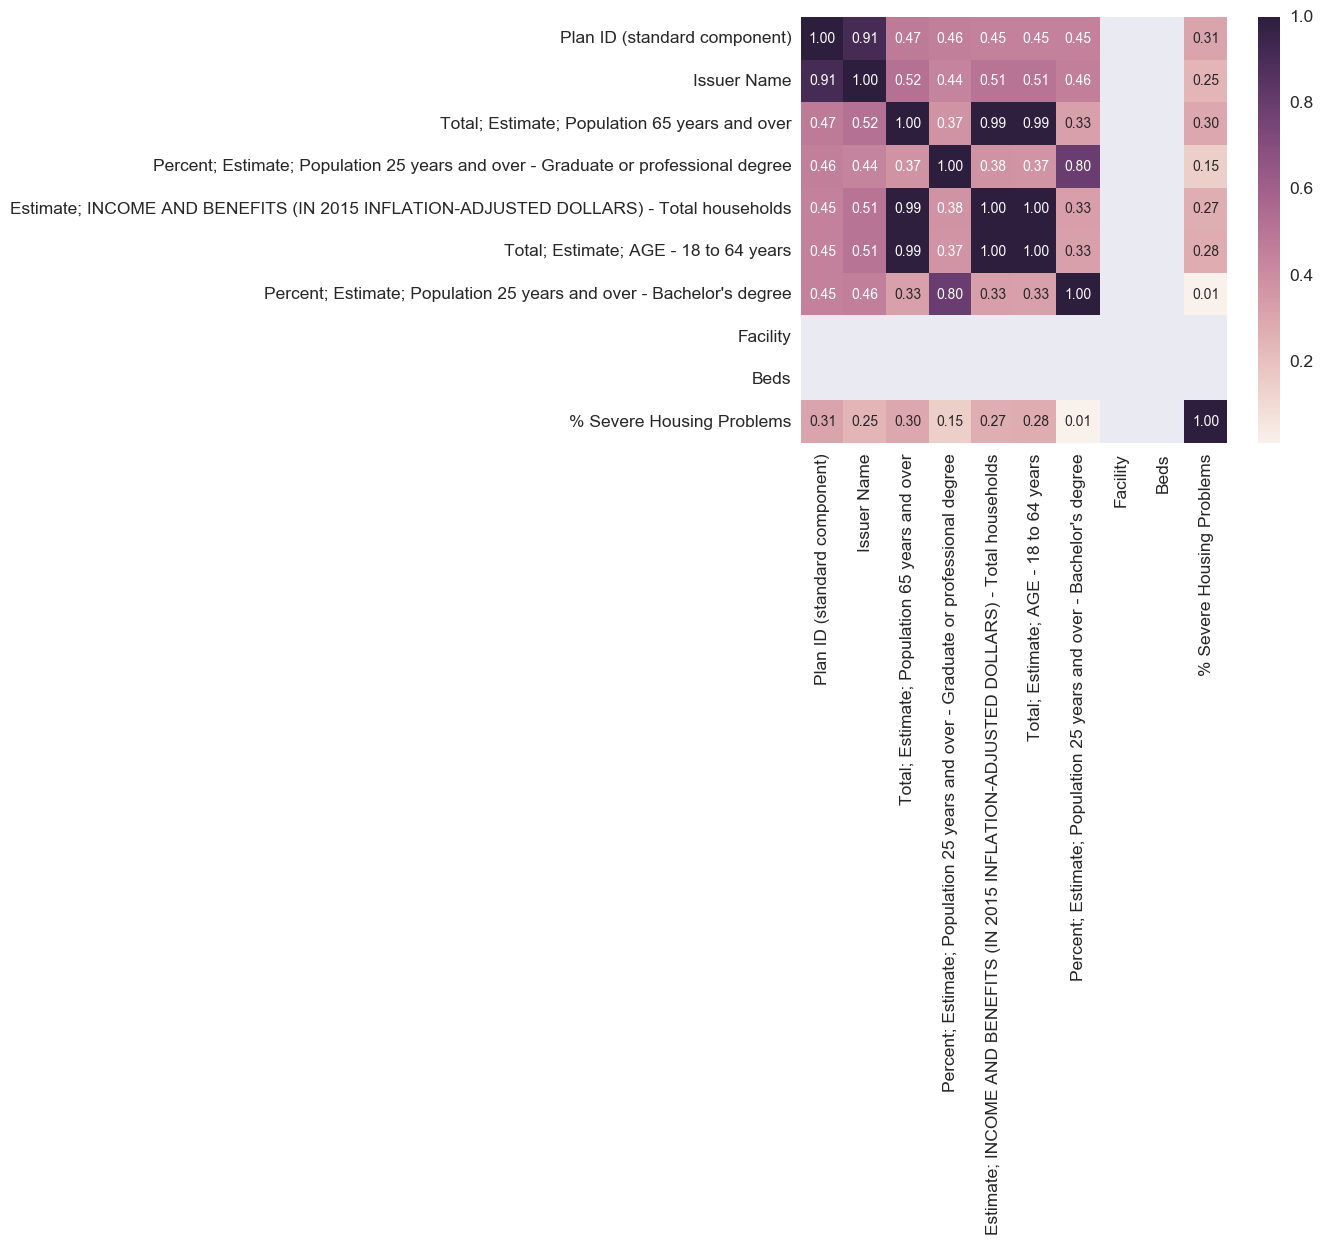

In [49]:
k = 10 #number of variables for heatmap
cols = corrmatPlans.nlargest(k, 'Plan ID (standard component)')['Plan ID (standard component)'].index
cm = np.corrcoef(PlansModelDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

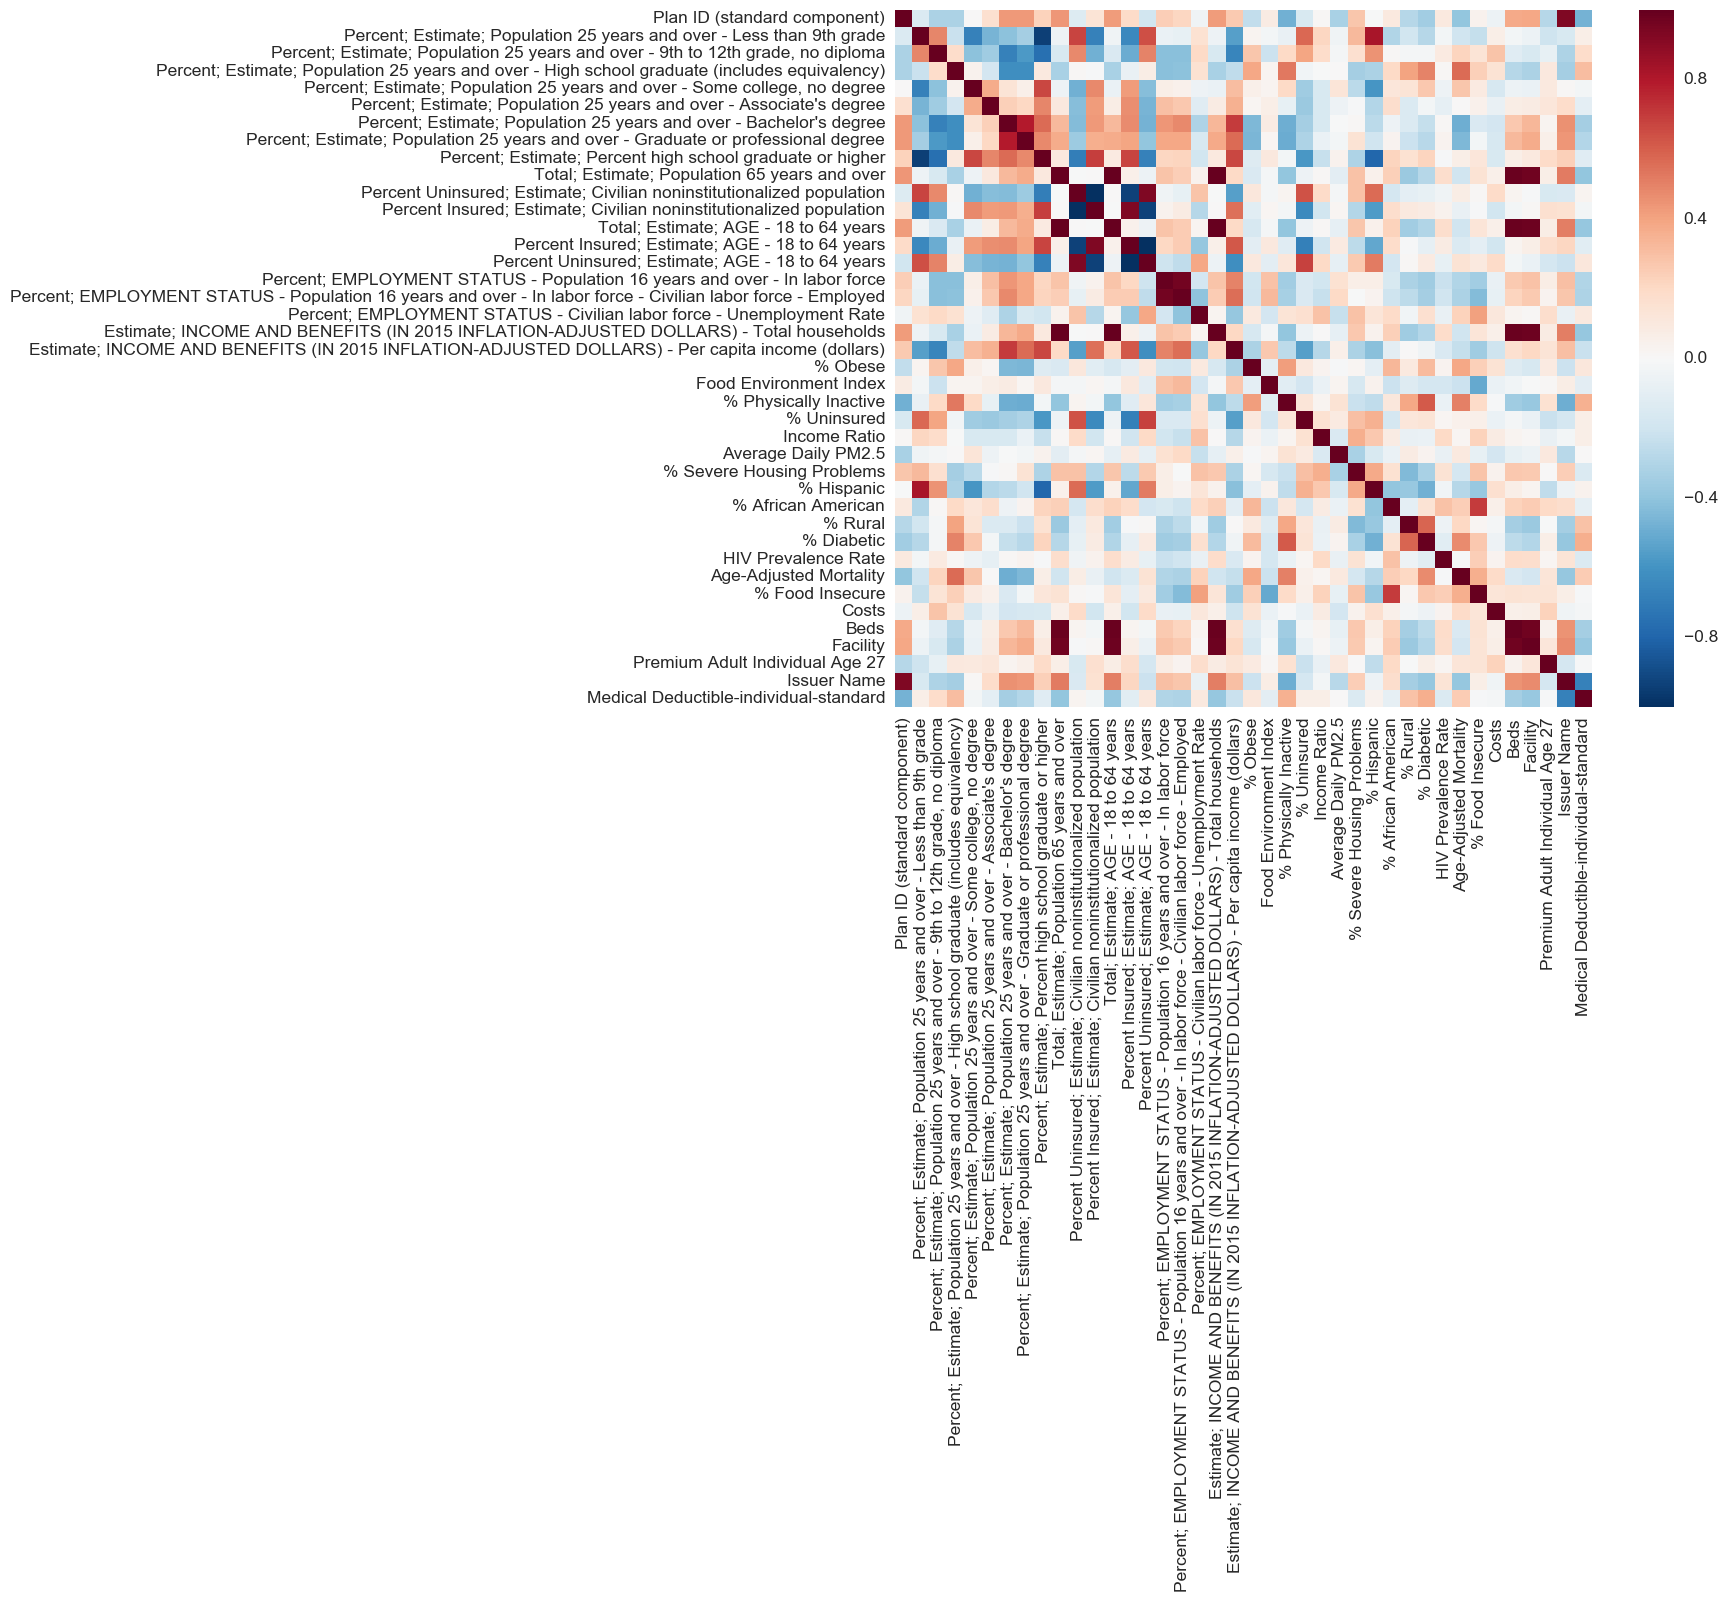

In [50]:
corrmatPlans = PlansModelDF2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatPlans, vmax=.8, square=True);

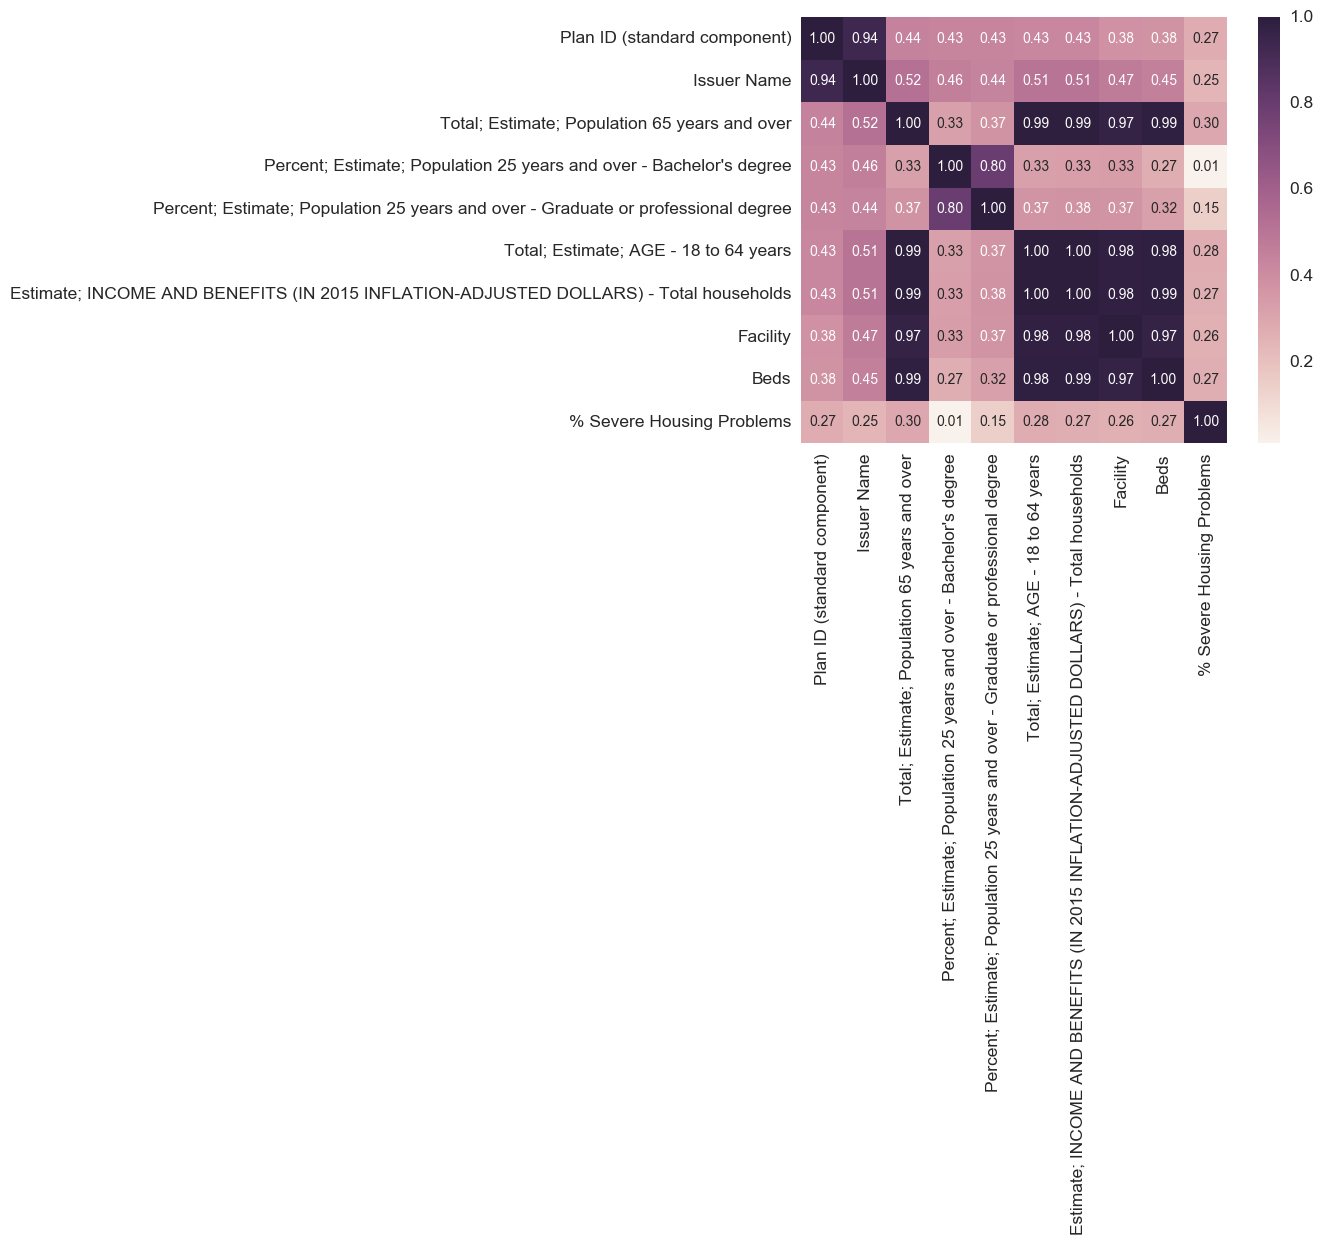

In [51]:
k = 10 #number of variables for heatmap
cols = corrmatPlans.nlargest(k, 'Plan ID (standard component)')['Plan ID (standard component)'].index
cm = np.corrcoef(PlansModelDF2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

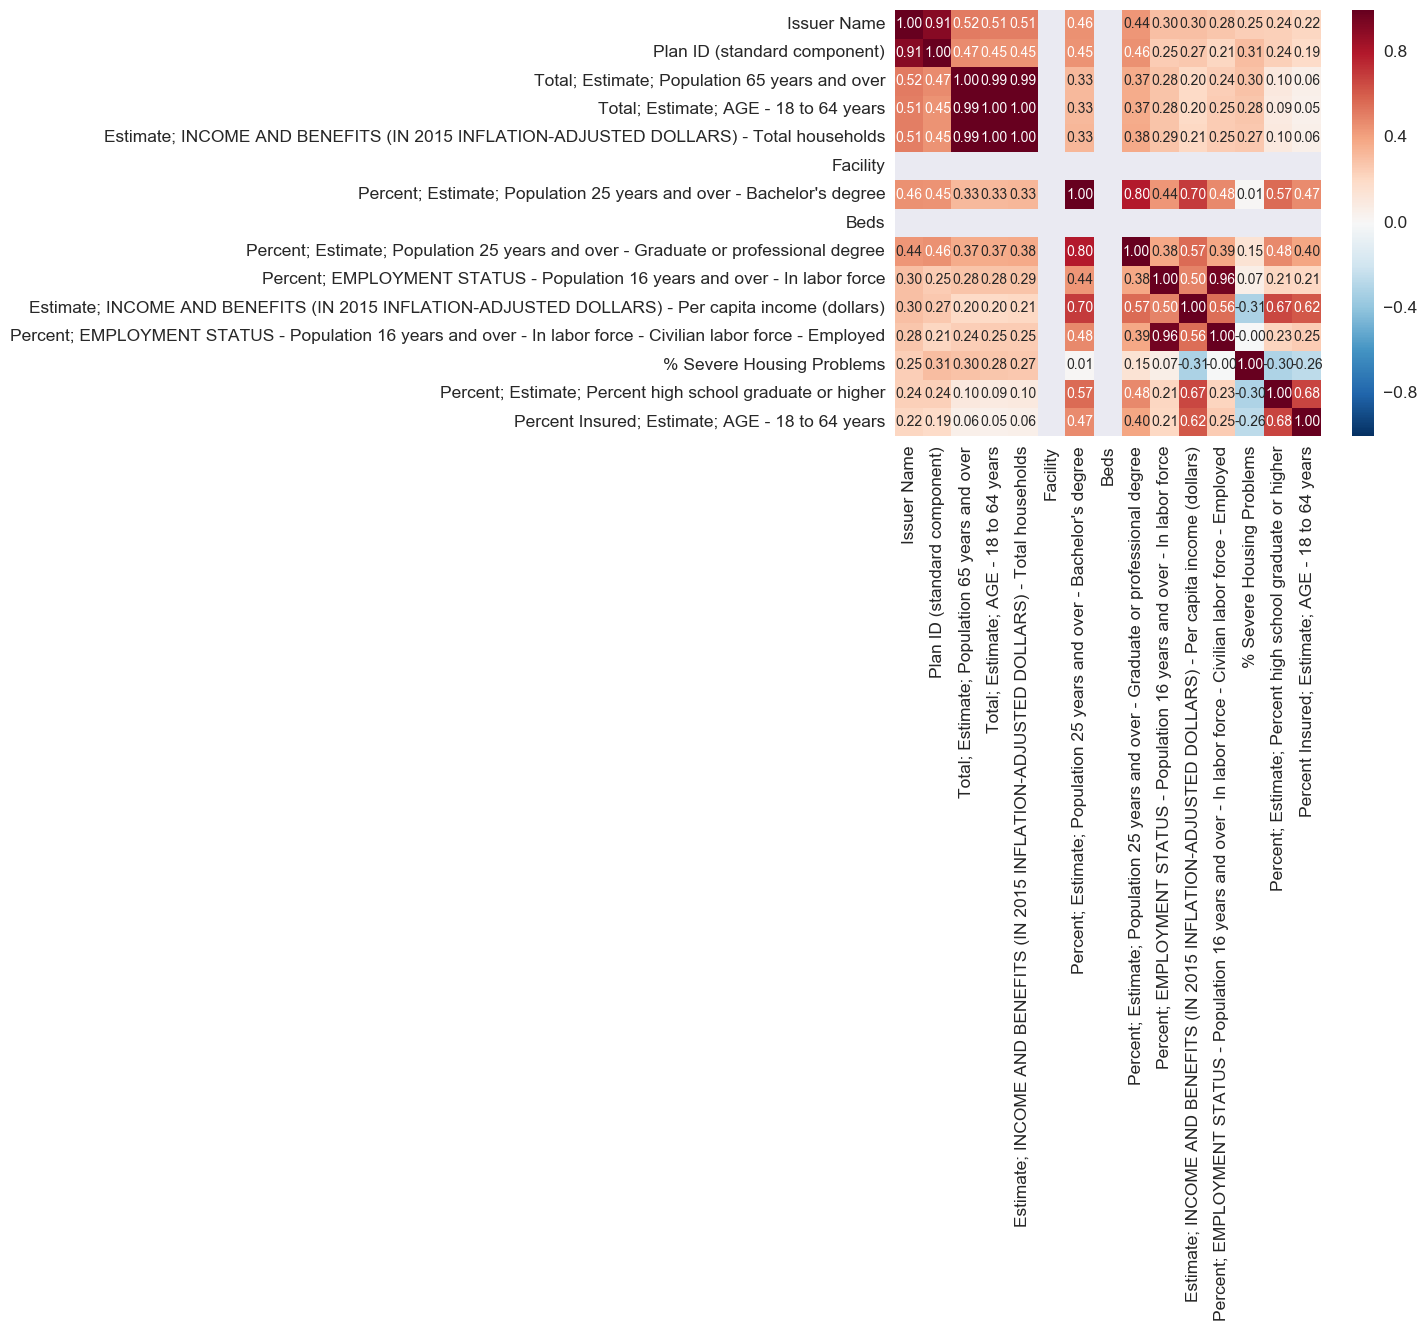

In [52]:
k = 15 #number of variables for heatmap
cols = corrmatPlans.nlargest(k, 'Issuer Name')['Issuer Name'].index
cm = np.corrcoef(PlansModelDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [53]:
PlansModelDF["Total; Estimate; AGE - 18 to 64 years"]=PlansModelDF["Total; Estimate; AGE - 18 to 64 years"].divide(1000)
PlansModelDF["Premium Adult Individual Age 27"]=PlansModelDF["Premium Adult Individual Age 27"].divide(100)

In [54]:
PlansModelDF["Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)"]=PlansModelDF["Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)"].divide(1000)

In [55]:
PlansModelDF["New Consumers"]=PlansModelDF["New Consumers"].divide(100)

KeyError: 'New Consumers'

In [ ]:
InsurersX=PlansModelDF[["% Hispanic", "Average Daily PM2.5", "% Physically Inactive", "% Diabetic", "Total; Estimate; AGE - 18 to 64 years", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)", "Premium Adult Individual Age 27", 'New Consumers', "Beds", "% African American"]]


In [ ]:
InsurersX = sm.add_constant(InsurersX)

model=smf.OLS(PlansModelDF["Issuer Name"], InsurersX).fit()

model.summary()

In [ ]:
TXOE2015=openEnrollment2015[openEnrollment2015["State"]=="TX"]
TXOE2015["County"]=""
for i in range(2031, 2285):
    TXOE2015["County"][i]=TXOE2015["County Name"][i].rsplit(" ", 1)[0]



In [ ]:
PlansModelDF=pd.merge(PlansModelDF, TXOE2015, left_on="County", right_on="County")

In [ ]:
PlansModelDF=PlansModelDF.replace("*", 0)

In [ ]:
PlansModelDF["Facility"]=PlansModelDF["Facility"].fillna(0)
PlansModelDF["Beds"]=PlansModelDF["Beds"].fillna(0)

In [ ]:
PlansModelDF2["High or Low Number of Insurers"]=0

In [ ]:
for i in range(len(PlansModelDF2["High or Low Number of Insurers"])):
    if PlansModelDF2["Issuer Name"][i]>2:
        PlansModelDF2["High or Low Number of Insurers"][i]=1
        


In [ ]:
PlansModelDF2["intercept"]=1.0